# <font color='red'><b>Bootstrap Implementation</b> </font>

<b>There will be some functions that start with the word "grader" ex: grader_sampples(), grader_30().. etc, you should not change those function definition.

Every Grader function has to return True.</b>

<font color='blue'> <b>Importing packages</b> </font>

In [95]:
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric
from sklearn.tree import DecisionTreeRegressor
from random import random
import warnings
warnings.filterwarnings("ignore")

In [96]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

In [97]:
x.shape

(506, 13)

In [98]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

## <font color='red'><b>Task 1</b></font>

<font color='red'> <b>Step - 1</b></font>

*  <font color='blue'><b>Creating samples</b></font><br>
    <b> Randomly create 30 samples from the whole boston data points</b>
    *  Creating each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points
    
     For better understanding of this procedure lets check this examples, assume we have 10 data points [1,2,3,4,5,6,7,8,9,10], first we take 6 data points randomly , consider we have selected [4, 5, 7, 8, 9, 3] now we will replicate 4 points from [4, 5, 7, 8, 9, 3], consder they are [5, 8, 3,7] so our final sample will be [4, 5, 7, 8, 9, 3, 5, 8, 3,7]
* <font color='blue'><b> Create 30 samples </b></font>
    *  Note that as a part of the Bagging when you are taking the random samples <b>make sure each of the sample will have different set of columns</b><br>
Ex: Assume we have 10 columns[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10] for the first sample we will select [3, 4, 5, 9, 1, 2] and for the second sample  [7, 9, 1, 4, 5, 6, 2] and so on...
Make sure each sample will have atleast 3 feautres/columns/attributes

<font color='red'><b>Step - 2 </b></font>

<font color='blue'><b>Building High Variance Models on each of the sample and finding train MSE value</b></font>

*  Build a regression trees on each of 30 samples.
*  Computed the predicted values of each data point(506 data points) in your corpus.
*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$
*  Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$

<font color='red'> <b>Step - 3 </b></font>

*  <font color='blue'><b>Calculating the OOB score </b></font>

*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{k}\sum_{\text{k= model which was buit on samples not included } x^{i}}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.
*  Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

# <font color='red'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

# <font color='red'><b>Task 3</b></font>

*  <font color='blue'><b>Given a single query point predict the price of house.</b></font>

Consider xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 
Predict the house price for this point as mentioned in the step 2 of Task 1.

<br><br><br>

# <font color='blue'> <b>Task - 1</b></font>

<font color='blue'><b>Step - 1</b></font>

*  <font color='blue'> <b>Creating samples</b></font>

<font color='Orange'><b>Algorithm</b></font>

![alt text](https://i.imgur.com/BTVYXQ1.jpg/)

*  <font color='blue'><b> Write code for generating samples</b></font>

In [130]:
def generating_samples(input_data, target_data):

    '''In this function, we will write code for generating 30 samples '''
    # you can use random.choice to generate random indices without replacement
    # Please have a look at this link https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.choice.html for more details
    # Please follow above pseudo code for generating samples 
    selecting_rows = np.random.choice([i for i in range(506)], size=303, replace=False)
    
    replicating_rows = np.random.choice(len(selecting_rows), size=203, replace=True)
    
    selecting_columns = np.random.choice([i for i in range(13)], size=np.random.randint(low=3, high=13), replace=False)

    
    sample_data = input_data[selecting_rows[:,None],selecting_columns]
    
    target_of_sample_data = target_data[selecting_rows]
    
    replicated_sample_data = sample_data[replicating_rows]
    
    target_of_replicated_sample_data = target_data[replicating_rows]
    
    #concatanating rows
    final_sample_data = np.vstack((sample_data.reshape(-1,1), replicated_sample_data.reshape(-1,1)))
    final_sample_data = final_sample_data.reshape(506,-1)
    
    final_target_data = np.vstack((target_of_sample_data.reshape(-1,1), target_of_replicated_sample_data.reshape(-1,1)))
    final_target_data = final_target_data.reshape(506,1)
    
    return final_sample_data , final_target_data, selecting_rows, selecting_columns

In [4]:
import numpy as np
selecting_rows = np.random.choice([i for i in range(506)], size=303, replace=False)
replicating_rows = np.random.choice(len(selecting_rows), size=203, replace=True)
selecting_columns = np.random.choice([i for i in range(13)], size=np.random.randint(low=3, high=13), replace=False)
len(selecting_rows)

303

In [6]:
np.random.choice([i for i in range(506)], size=203, replace=True)

array([131,  75,  46, 236, 166, 273, 100, 258, 258, 351, 239, 380, 305,
       260, 499, 282, 127, 433, 319, 341, 298,  92,  66, 441,  79, 359,
        26, 358, 353, 101,  71, 112,   5, 234, 342, 299, 499, 342, 498,
       346, 164,  62, 325, 418, 316, 260,  45,  96, 222, 372, 434, 287,
       187, 500, 466, 473, 251,  67, 488,  77, 500, 409, 374,  87, 180,
       141, 417, 425, 187, 471,  29, 476, 464, 400, 381, 379,   9, 179,
       187, 392, 447,   8, 472, 152, 187, 254, 352,  61,  17,  50,   4,
       299, 251,  63, 218, 460, 306,  79, 415, 209, 204,  58,   0, 330,
       486, 139,  78, 168, 499, 188, 436, 197,  43, 197, 333, 342,  22,
       128, 207,  84, 282, 350, 192, 454, 406, 172, 157, 280,  28, 121,
       143,  60, 147, 125,  40, 434, 224, 314, 394, 156, 465, 402, 243,
       292, 130, 224, 452, 485, 463, 463, 155, 348, 263, 435, 447, 338,
        58, 149, 124, 296, 268, 238, 440, 135,  59, 182, 348, 491,  79,
        17, 349, 140, 180, 504, 202,  52, 240, 464, 397,  28, 15

<font color='cyan'> <b> Grader function - 1 </b> </fongt>

In [131]:
def grader_samples(a,b,c,d):
    length = (len(a)==506  and len(b)==506)
    sampled = (len(a)-len(set([str(i) for i in a]))==203)
    rows_length = (len(c)==303)
    column_length= (len(d)>=3)
    assert(length and sampled and rows_length and column_length)
    return True
a,b,c,d = generating_samples(x, y)
grader_samples(a,b,c,d)

True

*  <font color='blue'> <b>Create 30 samples </b>

![alt text](https://i.imgur.com/p8eZaWL.jpg)

In [132]:
# Use generating_samples function to create 30 samples 
# store these created samples in a list

def stacking_samples(x, y):
    list_input_data =[]
    list_output_data =[]
    list_selected_rows= []
    list_selected_columns=[]

    for i in range(30):
        a,b,c,d = generating_samples(x, y)
        list_input_data.append(a)
        list_output_data.append(b)
        list_selected_rows.append(c)
        list_selected_columns.append(d)
    return list_input_data, list_output_data, list_selected_rows, list_selected_columns

<font color='cyan'> <b>Grader function - 2 </b></font>

In [133]:
def grader_30(a):
    assert(len(a)==30 and len(a[0])==506)
    return True
list_input_data, list_output_data, list_selected_row, list_selected_columns = stacking_samples(x, y)
grader_30(list_input_data)

True

In [134]:
list_input_data, list_output_data, list_selected_rows, list_selected_columns = stacking_samples(x, y)

<br>

<font color='red'><b>Step - 2 </b></font>

<font color='orange'><b>Flowchart for building tree</b></font>

![alt text](https://i.imgur.com/pcXfSmp.png)

*  <font color='blue'><b> Write code for building regression trees</b></font>

In [135]:
def build_randomForest(list_input_data, list_output_data):
    
    list_of_all_models = []
    for i in range(len(list_input_data)):
        X = list_input_data[i]
        Y = list_output_data[i]
        tree_Clf = DecisionTreeRegressor(max_depth=None)
        tree_Clf.fit(X, Y)
        
        list_of_all_models.append(tree_Clf)
    return list_of_all_models

In [136]:
models = build_randomForest(list_input_data, list_output_data)
print(len(models))

30


<font color='orange'><b>Flowchart for calculating MSE </b></font>

![alt text](https://i.imgur.com/sPEE618.png)

After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

*  <font color='blue'><b> Write code for calculating MSE</b></font>

In [137]:
def calculateMSE(input_data, models, list_selected_columns):
    y_pred_for_mse = []
    for i in input_data:
        y_pred = []
        for j in range(len(models)):
            y_pred.append( models[j].predict(i[list_selected_columns[j]].reshape(1, -1)) )
            #print(i[list_selected_columns[j]])
        y_pred_for_mse.append(np.median(np.array(y_pred)))
    mse = mean_squared_error(y, np.array(y_pred_for_mse))
    return mse

In [138]:
mean_sq_error = calculateMSE(x, models, list_selected_columns)
print('Mean Square Error: ', mean_sq_error)

Mean Square Error:  7.1856354468599015


<font color='blue'><b>Step - 3 </b></font>

<font color='orange'><b>Flowchart for calculating OOB score</b></font>

![alt text](https://i.imgur.com/95S5Mtm.png)

Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

*  <font color='blue'><b> Write code for calculating OOB score </b></font>

* Predicted house price of  𝑖𝑡ℎ  data point  𝑦𝑖𝑝𝑟𝑒𝑑=1𝑘∑k= model which was buit on samples not included 𝑥𝑖(predicted value of 𝑥𝑖 with 𝑘𝑡ℎ model) .
* Now calculate the  𝑂𝑂𝐵𝑆𝑐𝑜𝑟𝑒=1506∑506𝑖=1(𝑦𝑖−𝑦𝑖𝑝𝑟𝑒𝑑)2.

In [139]:
def calculateOOBscore(input_data, target_data, models, list_selected_rows, list_selected_columns):
    
    predicted_y = []
    for i, point in enumerate(input_data):
        
        model_y_pred = []
        for j, model in enumerate(models):
            if i not in list_selected_rows[j]:
                model_y_pred.append( model.predict(point[list_selected_columns[j]].reshape(1,-1)) )
        predicted_y.append(np.median(np.array(model_y_pred)))
    OOB_score = mean_squared_error(target_data, np.array(predicted_y))
    return OOB_score

In [140]:
oobScore = calculateOOBscore(x, y, models, list_selected_rows, list_selected_columns)
print('OOB Score: ', oobScore)

OOB Score:  24.213035559398335


# <font color='blue'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

*  <font color='blue'><b> Write code for Task 2 </b></font>

In [141]:
def calMSE_OOB(input_data, output_data):
    
    """
       This method calculated the MSE and OOB scores for 35 iteration and stores in a list of list_MSE, and list_OOB.
    """
    list_MSE = []
    list_OOB = []
    
    for i in range(35):
        list_inputs, list_outputs, list_rows, list_columns = stacking_samples(input_data, output_data)
        model_list = build_randomForest(list_inputs, list_outputs)
        mse = calculateMSE(input_data, model_list, list_columns)
        oob_score = calculateOOBscore(input_data, output_data, model_list, list_rows, list_columns)
    
        list_MSE.append(mse)
        list_OOB.append(oob_score)
    return list_MSE, list_OOB

In [142]:
%%time
MSE_List, OOB_Scores = calMSE_OOB(x, y)

Wall time: 44.3 s


In [143]:
print(MSE_List)

[7.934704830917874, 8.70688747351768, 8.788422868631972, 8.32749468050066, 9.288750769938776, 8.454031119784759, 8.935097168697848, 8.45498482515371, 7.288754186496734, 9.047206177261748, 7.766885587495336, 6.4753431005653255, 7.719120602287282, 7.322180315382082, 8.509853443347552, 9.813181265402775, 8.16969321388129, 8.011756857295783, 8.578090917101406, 8.179829573188874, 7.477468332812373, 10.592370867849823, 9.106476026404422, 7.205343103590251, 7.532638775026183, 8.040317886747914, 9.160046730139685, 8.683087804677205, 8.381232402527692, 8.889412493650806, 6.264414207290294, 7.395515500109791, 6.657301944718928, 5.5631907087176105, 7.104412573223735]


In [144]:
print(OOB_Scores)

[24.064157725351336, 26.024858442530082, 26.26889588274045, 25.019450839920946, 21.61148328373662, 23.132379676141305, 23.993517988012083, 25.806360649978043, 20.54716681488801, 25.297770166337287, 20.99997797160004, 24.771147874008296, 22.412840220420957, 23.815033624286343, 25.371423234147837, 25.54766957697615, 22.037049447506742, 23.337650764437857, 19.901915413894667, 25.133618431309674, 21.67968334772974, 23.938587267486447, 21.76721942099551, 25.223231101778655, 22.844981006856372, 22.30784876034192, 23.182009135807625, 24.066974382411065, 23.649397157718486, 24.83751376207404, 20.998198568566096, 22.250069975570923, 21.771073114295124, 19.39132835363394, 22.70752072473556]


<font color='orange'><b>Finding confidence interval</b></font>

* CI = x̄ ± z* σ / (√n)
* z = 1.96 for 95% CI from Z-table

In [145]:
def cal_ConfidenceInterval(input_sample):
    """
       This method takes list of sample values and calculate and return result for 95% CI.
    """
    mean = np.mean(input_sample)
    std_deviation = np.std(input_sample)
    n = len(input_sample)
    SE = std_deviation/(np.sqrt(n))
    z = 1.96
    CI_upper = mean + (SE*z)
    CI_lower = mean - (SE*z)
    return CI_upper, CI_lower, mean

In [146]:
CI_mse_upper, CI_mse_lower, Mean_mse = cal_ConfidenceInterval(MSE_List)
CI_oob_upper, CI_oob_lower, Mean_oob = cal_ConfidenceInterval(OOB_Scores)

In [147]:
print('MSE: \n\tMean MSE: {}\n\tCI upper limit: {}\n\tCI lower limit: {}'.format(Mean_mse, CI_mse_upper, CI_mse_lower))
print('OOB: \n\tMean OOB: {}\n\tCI upper limit: {}\n\tCI lower limit: {}'.format(Mean_oob, CI_oob_upper, CI_oob_lower))

MSE: 
	Mean MSE: 8.109299952409604
	CI upper limit: 8.445134270085726
	CI lower limit: 7.773465634733481
OOB: 
	Mean OOB: 23.30600011737789
	CI upper limit: 23.90147980049359
	CI lower limit: 22.710520434262193


Text(0.5, 0, 'Mean Squarred Error')

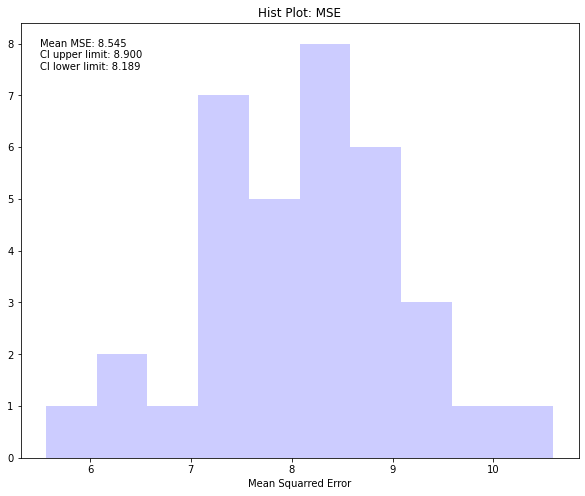

In [160]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.hist(MSE_List, bins=10, alpha=0.2, color='blue')
plt.text(5.5,7.5, 'Mean MSE: 8.545\nCI upper limit: 8.900\nCI lower limit: 8.189')
plt.title('Hist Plot: MSE')
plt.xlabel('Mean Squarred Error')

Text(0.5, 0, 'Out of bag scores')

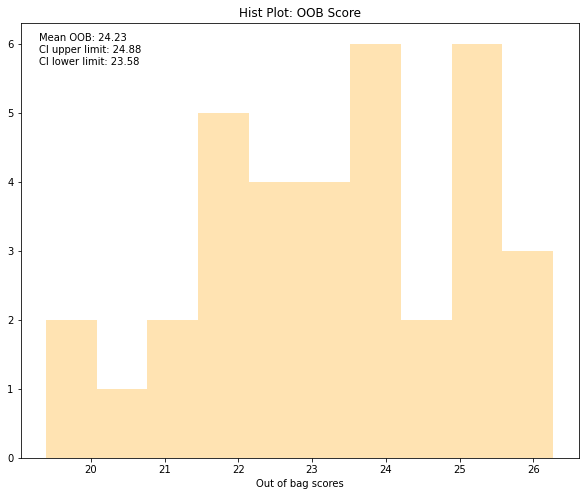

In [164]:
plt.figure(figsize=(10,8))
plt.hist(OOB_Scores, bins=10, alpha=0.3, color='orange')
plt.text(19.3,5.7, 'Mean OOB: 24.23\nCI upper limit: 24.88\nCI lower limit: 23.58')
plt.title('Hist Plot: OOB Score')
plt.xlabel('Out of bag scores')

# <font color='blue'><b>Task 3</b></font>

<font color='orange'><b>Flowchart for Task 3</b></font>

<b>Hint: </b> We created 30 models by using 30 samples in TASK-1. Here, we need send query point "xq"  to 30 models and perform the regression on the output generated by 30 models.

![alt text](https://i.imgur.com/Y5cNhQk.png)

*  <font color='blue'><b> Write code for TASK 3 </b></font>

In [150]:
xq = np.array([0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60])

pred_Y = []
for i in range(len(list_selected_columns)):
    pred = models[i].predict(xq[list_selected_columns[i]].reshape(1,-1))
    pred_Y.append(pred)
prediction = np.median(np.array(pred_Y))

print('Price prediction for given query point is: ', prediction)

Price prediction for given query point is:  21.549999999999997


<br><br><br>

<font color='red'><b>Write observations for task 1, task 2, task 3 indetail</b></font>

### Task1: 
* We calculated Means Squarred Error ~ 7
* OOB Score: 24.21

### Task2:
* MSE: 
        Mean MSE: 8.10
        CI upper limit: 8.44
        CI lower limit: 7.77
* OOB: 
        Mean OOB: 23.30
        CI upper limit: 23.90
        CI lower limit: 22.71
        
### Task3:
* Price Prediction for given query point = 21.55

## <font color='Green'><b>Thank You</b></font>